In [1]:
%pip install holoviews

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import requests
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts
from bs4 import BeautifulSoup
from urllib.request import urljoin


In [3]:
sites = "https://www.google.com/" #@param {type:"string"}
depth = 3 #@param {type:"slider", min:1, max:10, step:1}
max_child = 10 #@param {type:"slider", min:1, max:100, step:1}

def crawl(sites, depth=1, current_depth=0, max_child=10):
    get_links = lambda site: pd.Series(urljoin(site, tag.get('href')) for tag in BeautifulSoup(requests.get(site).text).find_all('a')).drop_duplicates().head(max_child)
    
    sites = pd.concat([sites, pd.DataFrame([{'link': link, 'parent': site, 'depth': current_depth + 1}
                                       for site in sites[sites.depth == current_depth].link
                                       for link in get_links(site)])], 
                         ignore_index=True).drop_duplicates('link')
    
    if depth > current_depth + 1:
        return crawl(sites, depth=depth, current_depth=current_depth+1, max_child=max_child)
    else:
        return sites


result = crawl(sites=pd.DataFrame([{'link': site, 'depth': 0, 'parent': site} for site in sites.split()]), 
               max_child=max_child,
               depth=depth)

In [ ]:
result

,link,depth,parent
0,https://www.google.com/,0,https://www.google.com/
1,https://www.google.com/imghp?hl=km&tab=wi,1,https://www.google.com/
2,https://maps.google.com.kh/maps?hl=km&tab=wl,1,https://www.google.com/
3,https://play.google.com/?hl=km&tab=w8,1,https://www.google.com/
4,https://news.google.com/?tab=wn,1,https://www.google.com/
...,...,...,...
487,https://support.google.com/websearch/?hl=en,3,https://support.google.com/websearch/?p=displa...
488,https://support.google.com/websearch/community...,3,https://support.google.com/websearch/?p=displa...
491,https://support.google.com/websearch/?p=result...,3,https://support.google.com/websearch/?p=result...
495,https://accounts.google.com/ServiceLogin?hl=en...,3,https://support.google.com/websearch/?p=result...


In [ ]:
# this is just the example scenarios
# from the results you can see the links "https://support.google.com/websearch", "https://play.google.com"
# it could be the all services google site

In [7]:
#Task : write the regular expression to get all the services of google

import re

# Regular expression pattern to match the services
pattern = r"https?://(?:www\.)?([a-zA-Z0-9_-]+)\.google\.[a-zA-Z0-9_-]+"

# Extract the services from the links
services = result['link'].str.lower().apply(lambda x: re.findall(pattern, x)).explode().dropna()

# Print all services, including the repeated ones
print(services)

0           www
1           www
2          maps
3          play
4          news
         ...   
488     support
491     support
495    accounts
495     support
498     support
Name: link, Length: 262, dtype: object


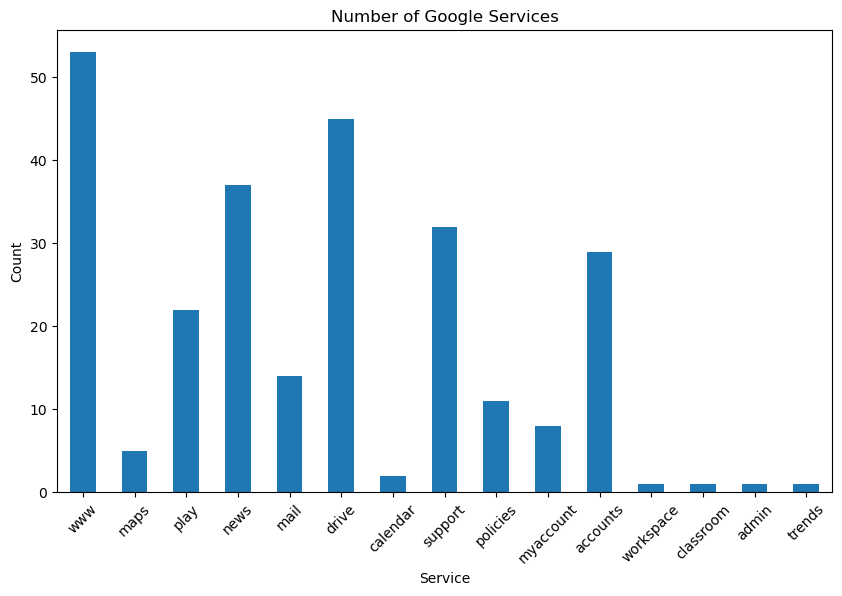

In [8]:
#Task : Visualize the services : - how many services that google have? 


import matplotlib.pyplot as plt
from collections import Counter

# Count the number of services
service_counts = Counter(services)

# Convert the service counts to a pandas Series
service_counts_series = pd.Series(service_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
service_counts_series.plot(kind='bar')
plt.title('Number of Google Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()